In [37]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count,avg,countDistinct,expr,stddev
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("vegetable").getOrCreate()


# loading dataset mandi.csv

In [3]:
df = spark.read.csv(r"C:\Users\Chara\OneDrive\Desktop\BDA Project\mandi.csv", header=True, inferSchema=True)

# printing summary

In [4]:
df.printSchema()

root
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Market: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Variety: string (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Arrival_Date: string (nullable = true)
 |-- Min_x0020_Price: integer (nullable = true)
 |-- Max_x0020_Price: integer (nullable = true)
 |-- Modal_x0020_Price: integer (nullable = true)



# data describing

In [5]:
df.describe().show()

+-------+--------------+----------+--------------+------------+----------------+-----+------------+-----------------+-----------------+-----------------+
|summary|         State|  District|        Market|   Commodity|         Variety|Grade|Arrival_Date|  Min_x0020_Price|  Max_x0020_Price|Modal_x0020_Price|
+-------+--------------+----------+--------------+------------+----------------+-----+------------+-----------------+-----------------+-----------------+
|  count|          1370|      1370|          1370|        1370|            1370| 1370|        1370|             1370|             1370|             1370|
|   mean|          NULL|      NULL|          NULL|        NULL|          1060.0| NULL|        NULL|3417.278102189781|4045.943795620438|3763.865693430657|
| stddev|          NULL|      NULL|          NULL|        NULL|86.2670273047588| NULL|        NULL|3456.502056318581|4093.656369064894|3692.547242622293|
|    min|Andhra Pradesh|Ahmednagar|         A lot|  Amaranthus|        1009 

# printing top 10 rows

In [6]:
print("=== First 10 rows ===")
df.show(10)

=== First 10 rows ===
+----------+----------------+--------------------+--------------------+--------------------+-------+------------+---------------+---------------+-----------------+
|     State|        District|              Market|           Commodity|             Variety|  Grade|Arrival_Date|Min_x0020_Price|Max_x0020_Price|Modal_x0020_Price|
+----------+----------------+--------------------+--------------------+--------------------+-------+------------+---------------+---------------+-----------------+
|Chandigarh|      Chandigarh|Chandigarh(Grain/...|         Cauliflower|         Cauliflower|    FAQ|  30/09/2025|           3000|           5000|             4000|
|Chandigarh|      Chandigarh|Chandigarh(Grain/...|       Ginger(Green)|               Other|    FAQ|  30/09/2025|           2000|           3500|             2800|
|Chandigarh|      Chandigarh|Chandigarh(Grain/...|            Peas Wet|               Other|    FAQ|  30/09/2025|           5000|          10000|             

# What is the total number of records in the dataset

In [7]:
total_records = df.count()
print("Total number of records:", total_records)

Total number of records: 1370


# Which states/regions have the highest and lowest number of mandi entries?

In [8]:
state_counts = df.groupBy("State").agg(count("*").alias("entry_count"))
highest_state = state_counts.orderBy(col("entry_count").desc()).limit(10)
lowest_state = state_counts.orderBy(col("entry_count").asc()).limit(10)
print("State with highest number of entries:")
highest_state.show()

print("State with lowest number of entries:")
lowest_state.show()

State with highest number of entries:
+----------------+-----------+
|           State|entry_count|
+----------------+-----------+
|          Kerala|        279|
|   Uttar Pradesh|        244|
|Himachal Pradesh|        179|
|          Punjab|        111|
|         Haryana|         97|
|     Maharashtra|         91|
|  Madhya Pradesh|         83|
|         Gujarat|         61|
|       Karnataka|         44|
|     West Bengal|         39|
+----------------+-----------+

State with lowest number of entries:
+-----------------+-----------+
|            State|entry_count|
+-----------------+-----------+
|   Andhra Pradesh|          1|
|            Bihar|          2|
|        Telangana|          5|
|       Uttrakhand|          8|
|       Chandigarh|         14|
|         Nagaland|         17|
|           Odisha|         24|
|Jammu and Kashmir|         33|
|        Rajasthan|         38|
|      West Bengal|         39|
+-----------------+-----------+



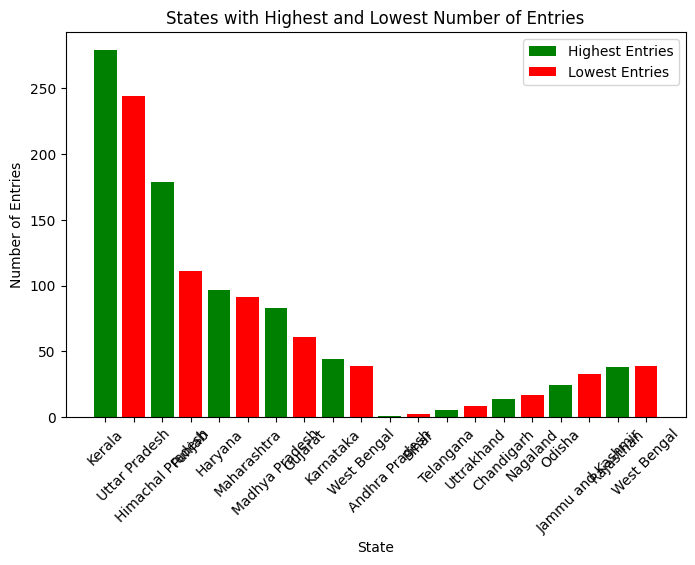

In [9]:
top_bottom_pd = highest_state.union(lowest_state).toPandas()
colors = ["green", "red"]
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(top_bottom_pd)), top_bottom_pd["entry_count"], color=colors)
plt.xticks(range(len(top_bottom_pd)), top_bottom_pd["State"], rotation=45)
plt.xlabel("State")
plt.ylabel("Number of Entries")
plt.title("States with Highest and Lowest Number of Entries")
plt.legend(bars, ["Highest Entries", "Lowest Entries"])
plt.show()

#  the average price/value across all states?

In [10]:

avg_price = df.select(avg("Modal_x0020_Price").alias("average_price"))
avg_price.show()


+-----------------+
|    average_price|
+-----------------+
|3763.865693430657|
+-----------------+



# Which state has the maximum average price?

In [11]:
highest_avg_state_df = df.groupBy("State") \
    .agg(avg("Modal_x0020_Price").alias("avg_price")) \
    .orderBy(col("avg_price").desc()) \
    .limit(1)
print("State with the highest average price:")
highest_avg_state_df.show()

State with the highest average price:
+--------+-----------------+
|   State|        avg_price|
+--------+-----------------+
|Nagaland|7305.882352941177|
+--------+-----------------+



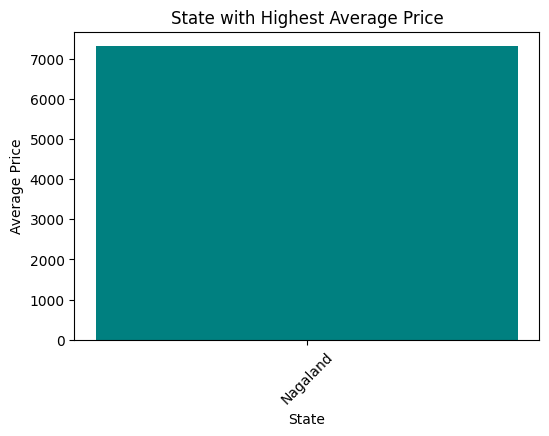

In [12]:
highest_avg_state_pd = highest_avg_state_df.toPandas()
plt.figure(figsize=(6, 4))
plt.bar(highest_avg_state_pd["State"], highest_avg_state_pd["avg_price"], color="teal")
plt.xlabel("State")
plt.ylabel("Average Price")
plt.title("State with Highest Average Price")
plt.xticks(rotation=45)
plt.show()

# Which state has the minimum average price?

In [13]:
lowest_avg_state_df = df.groupBy("State") \
    .agg(avg("Modal_x0020_Price").alias("avg_price")) \
    .orderBy(col("avg_price").asc()) \
    .limit(1)
print("State with the lowest average price:")
lowest_avg_state_df.show()

State with the lowest average price:
+-----+---------+
|State|avg_price|
+-----+---------+
|Bihar|   2300.0|
+-----+---------+



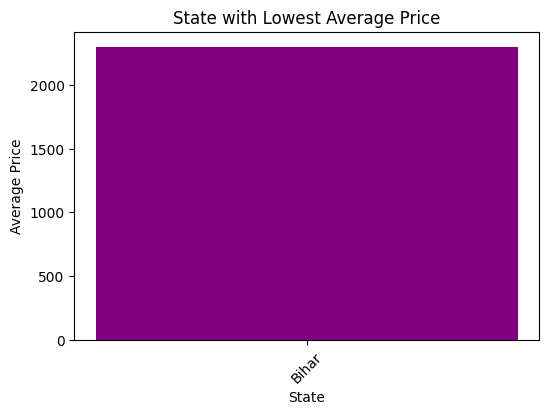

In [14]:
lowest_avg_state_pd = lowest_avg_state_df.toPandas()
plt.figure(figsize=(6, 4))
plt.bar(lowest_avg_state_pd["State"], lowest_avg_state_pd["avg_price"], color="purple")
plt.xlabel("State")
plt.ylabel("Average Price")
plt.title("State with Lowest Average Price")
plt.xticks(rotation=45)
plt.show()

# What are the top 5 commodities with the highest average price?

In [15]:
top5_df=df.groupBy("Commodity") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy(col("avg_price").desc()) \
  .limit(5) \
  .show()

+--------------------+---------+
|           Commodity|avg_price|
+--------------------+---------+
|        Black pepper|  52000.0|
|Arecanut(Betelnut...|  48954.0|
|         Coconut Oil|  39000.0|
|  Cummin Seed(Jeera)|  16925.0|
|         Mustard Oil|  15400.0|
+--------------------+---------+



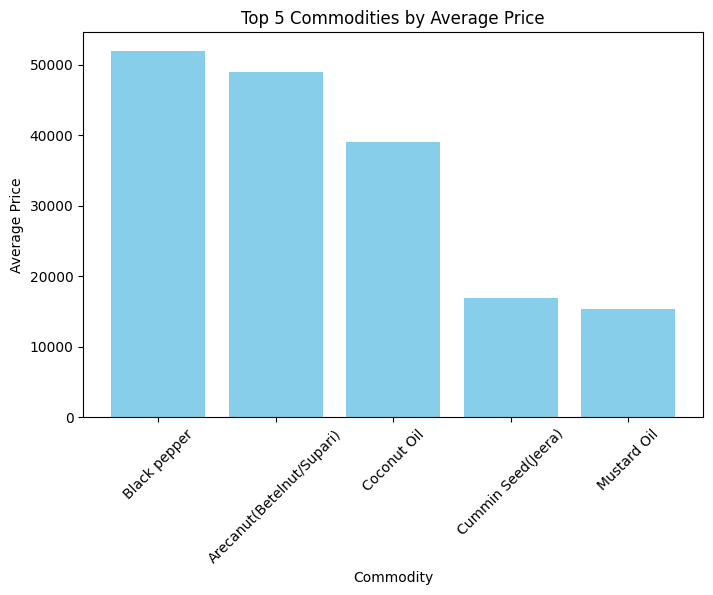

In [16]:
top5_df = df.groupBy("Commodity") \
    .agg(avg("Modal_x0020_Price").alias("avg_price")) \
    .orderBy(col("avg_price").desc()) \
    .limit(5)

top5_pd = top5_df.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(top5_pd["Commodity"], top5_pd["avg_price"], color="skyblue")
plt.xlabel("Commodity")
plt.ylabel("Average Price")
plt.title("Top 5 Commodities by Average Price")
plt.xticks(rotation=45)
plt.show()

# What are the bottom 5 commodities with the lowest average price

In [17]:
from pyspark.sql.functions import avg, col
import matplotlib.pyplot as plt
bottom5_df = df.groupBy("Commodity") \
               .agg(avg("Modal_x0020_Price").alias("avg_price")) \
               .orderBy(col("avg_price").asc()) \
               .limit(5)

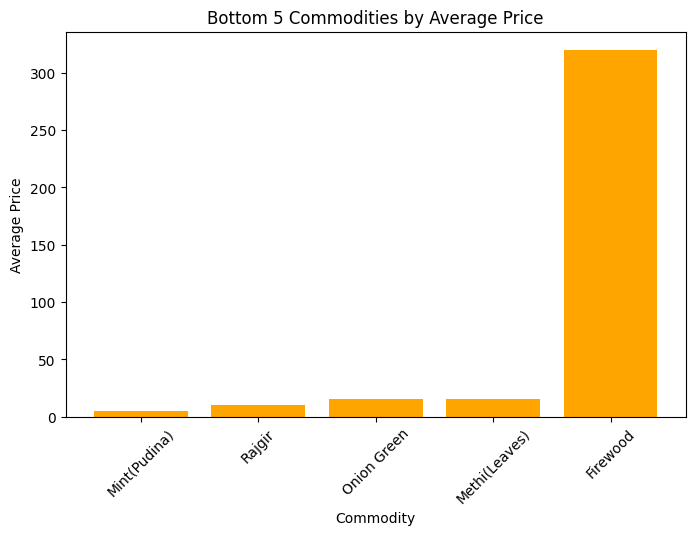

In [18]:
bottom5_pd = bottom5_df.toPandas()
plt.figure(figsize=(8, 5))
plt.bar(bottom5_pd["Commodity"], bottom5_pd["avg_price"], color="orange")
plt.xlabel("Commodity")
plt.ylabel("Average Price")
plt.title("Bottom 5 Commodities by Average Price")
plt.xticks(rotation=45)
plt.show()

# Which state has the maximum number of unique commodities

In [19]:
top_state_df = df.groupBy("State") \
    .agg(countDistinct("Commodity").alias("unique_commodities")) \
    .orderBy(col("unique_commodities").desc()) \
    .limit(1)
print("State with highest number of unique commodities:")
top_state_df.show()

State with highest number of unique commodities:
+------+------------------+
| State|unique_commodities|
+------+------------------+
|Kerala|                56|
+------+------------------+



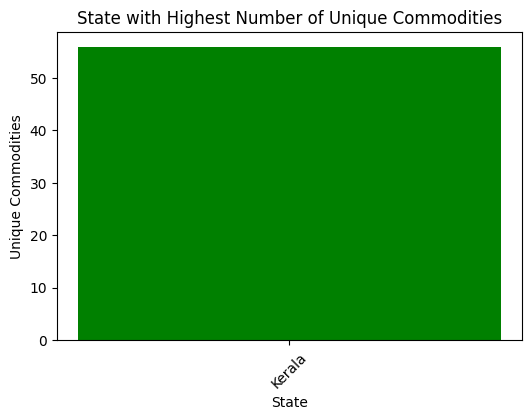

In [20]:
top_state_pd = top_state_df.toPandas()
plt.figure(figsize=(6, 4))
plt.bar(top_state_pd["State"], top_state_pd["unique_commodities"], color="green")
plt.xlabel("State")
plt.ylabel("Unique Commodities")
plt.title("State with Highest Number of Unique Commodities")
plt.xticks(rotation=45)
plt.show()

# Which commodity is most frequently listed in the dataset

In [21]:
top_commodity_df = df.groupBy("Commodity") \
    .agg(count("*").alias("entry_count")) \
    .orderBy(col("entry_count").desc()) \
    .limit(1)
print("Commodity with highest number of entries:")
top_commodity_df.show()

Commodity with highest number of entries:
+---------+-----------+
|Commodity|entry_count|
+---------+-----------+
|   Potato|         79|
+---------+-----------+



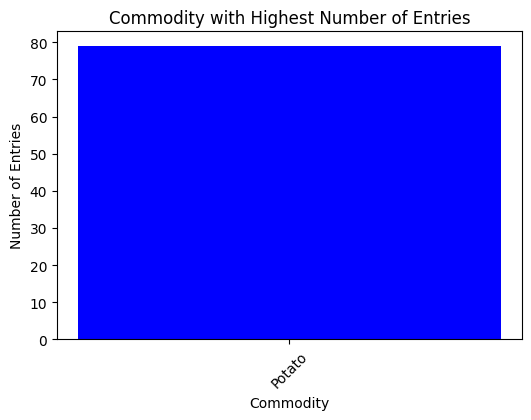

In [22]:
top_commodity_pd = top_commodity_df.toPandas()
plt.figure(figsize=(6, 4))
plt.bar(top_commodity_pd["Commodity"], top_commodity_pd["entry_count"], color="blue")
plt.xlabel("Commodity")
plt.ylabel("Number of Entries")
plt.title("Commodity with Highest Number of Entries")
plt.xticks(rotation=45)
plt.show()

# What is the trend of average prices over time (if date column is present)

In [23]:
df = df.withColumn("Arrival_Date", expr("try_to_timestamp(Arrival_Date, 'dd/MM/yyyy')"))
df.filter(col("Arrival_Date").isNotNull()) \
  .groupBy("Arrival_Date") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy("Arrival_Date") \
  .show()

+-------------------+-----------------+
|       Arrival_Date|        avg_price|
+-------------------+-----------------+
|2025-09-30 00:00:00|3763.865693430657|
+-------------------+-----------------+



# Which state shows the highest variation (std. deviation) in prices

In [24]:
top_states_std_df = df.groupBy("State") \
    .agg(stddev("Modal_x0020_Price").alias("price_stddev")) \
    .orderBy(col("price_stddev").desc()) \
    .limit(10)
print("Top 10 states with highest price variation:")
top_states_std_df.show()

Top 10 states with highest price variation:
+-----------------+------------------+
|            State|      price_stddev|
+-----------------+------------------+
|        Karnataka| 9756.140969746413|
|         Nagaland| 5971.858022030842|
|           Kerala| 4656.185624119454|
|Jammu and Kashmir|  3724.86335421526|
| Himachal Pradesh|3724.6289445514462|
|      West Bengal|2792.6975577607413|
|       Chandigarh| 2555.794966754554|
|          Gujarat|2389.2123922312257|
|        Rajasthan|  2379.47411560965|
|      Maharashtra|2259.0112894496137|
+-----------------+------------------+



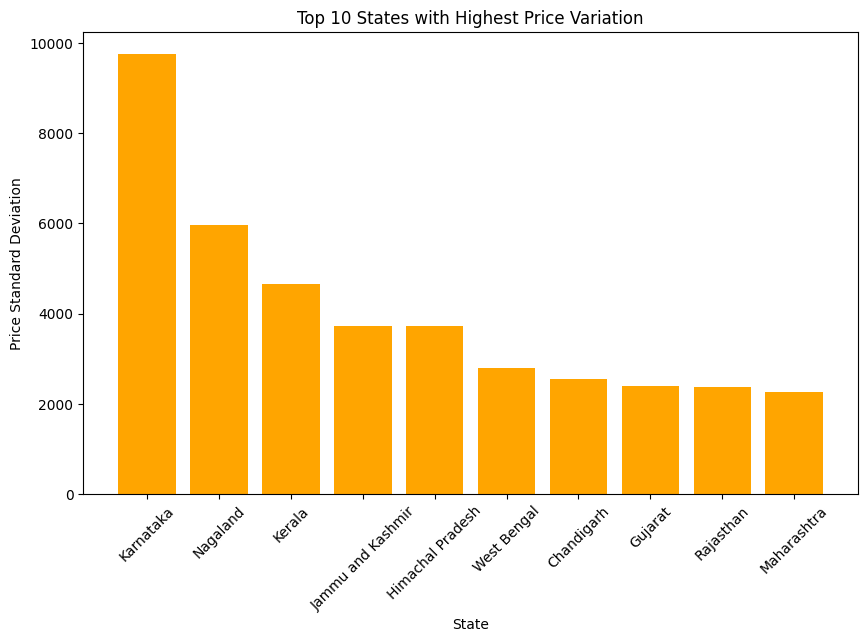

In [25]:
top_states_std_pd = top_states_std_df.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(top_states_std_pd["State"], top_states_std_pd["price_stddev"], color="orange")
plt.xlabel("State")
plt.ylabel("Price Standard Deviation")
plt.title("Top 10 States with Highest Price Variation")
plt.xticks(rotation=45)
plt.show()

# Which commodity has the most stable (least varying) price across markets

In [26]:
df_clean = df.withColumn("price_double", col("Modal_x0020_Price").cast("double")) \
             .filter(col("price_double").isNotNull())

df_clean.groupBy("Commodity") \
        .agg(stddev("price_double").alias("price_stddev")) \
        .orderBy(col("price_stddev").asc()) \
        .limit(1) \
        .show()

+---------+------------+
|Commodity|price_stddev|
+---------+------------+
|Thondekai|        NULL|
+---------+------------+



# What is the  mandi count per state

In [27]:
state_df = df.groupBy("State") \
    .agg(count("*").alias("mandi_count")) \
    .orderBy(col("mandi_count").desc())

state_df.show()

+-----------------+-----------+
|            State|mandi_count|
+-----------------+-----------+
|           Kerala|        279|
|    Uttar Pradesh|        244|
| Himachal Pradesh|        179|
|           Punjab|        111|
|          Haryana|         97|
|      Maharashtra|         91|
|   Madhya Pradesh|         83|
|          Gujarat|         61|
|        Karnataka|         44|
|      West Bengal|         39|
|        Rajasthan|         38|
|Jammu and Kashmir|         33|
|           Odisha|         24|
|         Nagaland|         17|
|       Chandigarh|         14|
|       Uttrakhand|          8|
|        Telangana|          5|
|            Bihar|          2|
|   Andhra Pradesh|          1|
+-----------------+-----------+



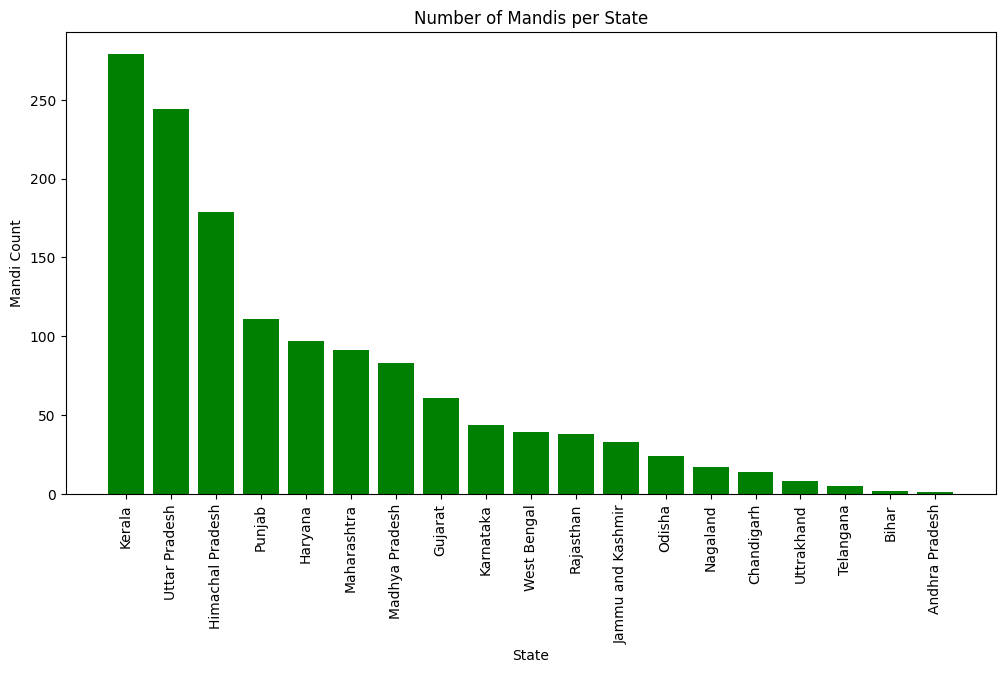

In [28]:
state_pd = state_df.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(state_pd["State"], state_pd["mandi_count"], color="green")
plt.xlabel("State")
plt.ylabel("Mandi Count")
plt.title("Number of Mandis per State")
plt.xticks(rotation=90)
plt.show()

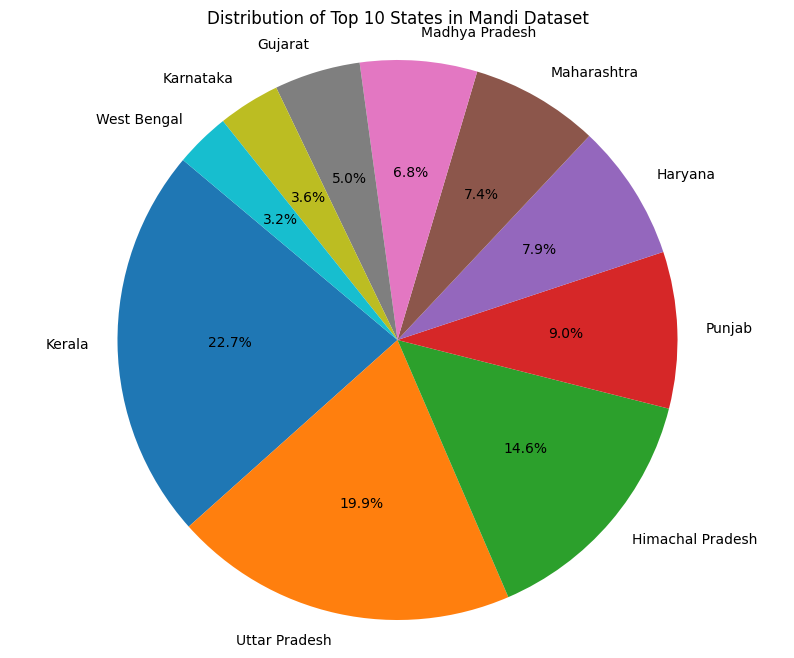

In [30]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# 1. Calculate the top 10 states using PySpark
# Group by the 'State' column, count the occurrences, and order by the count in descending order.
state_counts_df = df.groupBy("State").count().orderBy(col("count").desc())

# Limit the result to the top 10.
top_10_states_df = state_counts_df.limit(10)

# 2. Prepare data for plotting
# Collect the data from the PySpark DataFrame to the driver node.
# This is necessary because plotting libraries like Matplotlib run on a single machine, not distributed across the cluster.
top_10_states_data = top_10_states_df.collect()

# Extract the state names (labels) and their counts (sizes) for the pie chart.
labels = [row['State'] for row in top_10_states_data]
sizes = [row['count'] for row in top_10_states_data]

# 3. Create the Pie Chart with Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 States in Mandi Dataset')
plt.axis('equal')  # Ensures the pie chart is a circle.

# Display the chart in your notebook
plt.show()

C:\Users\Chara\AppData\Local\Temp\ipykernel_14688\1095382543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Modal_Price_Float', data=pandas_df, palette='viridis')


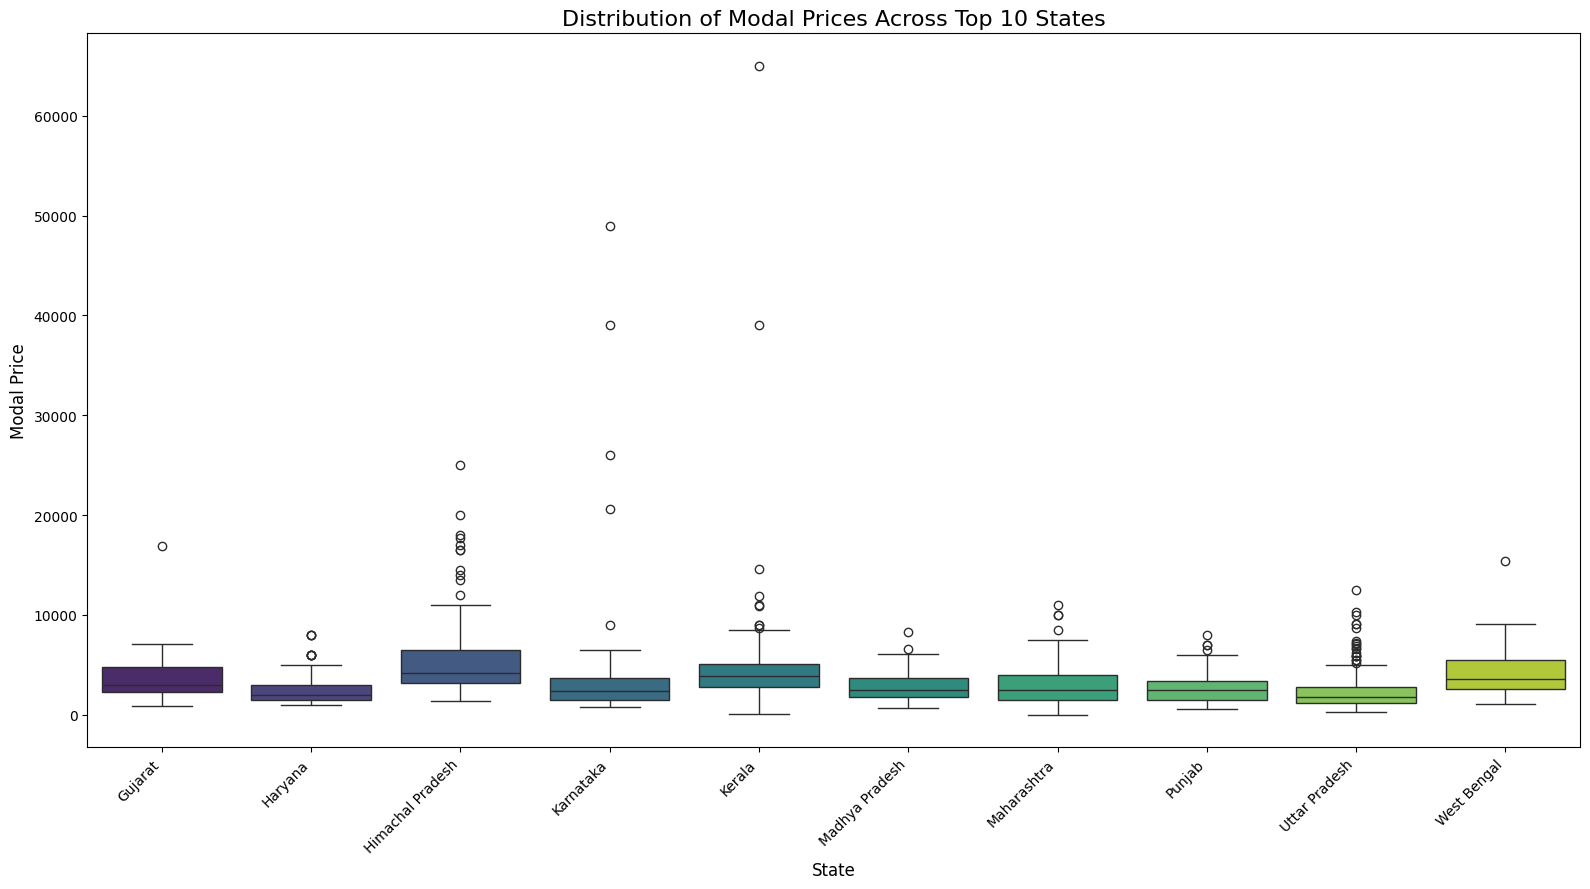

In [32]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify the top 10 states by count
top_10_states_list = [row['State'] for row in df.groupBy("State").count().orderBy(col("count").desc()).limit(10).collect()]

# 2. Filter the DataFrame and cast the price column to a number
# THIS LINE IS NOW CORRECTED
filtered_df = df.filter(df.State.isin(top_10_states_list)) \
                .withColumn("Modal_Price_Float", col("Modal_x0020_Price").cast(FloatType()))

# 3. Convert the filtered PySpark DataFrame to a pandas DataFrame for easy plotting
pandas_df = filtered_df.select("State", "Modal_Price_Float").toPandas()

# 4. Create the Box Plot using Seaborn
plt.figure(figsize=(16, 9))
sns.boxplot(x='State', y='Modal_Price_Float', data=pandas_df, palette='viridis')

# Add titles and labels for clarity
plt.title('Distribution of Modal Prices Across Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Modal Price', fontsize=12)

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')

# Ensure the plot layout is tight and clean
plt.tight_layout()

# Display the plot
plt.show()

# How many missing/invalid entries are there in price or commodity columns

In [79]:

df.filter(col("Modal_x0020_Price").isNull() | col("Commodity").isNull()).count()


0

# Which state + commodity combination has the highest recorded price?


In [80]:
df_price = df.withColumn("price_double", col("Modal_x0020_Price").cast("double")) \
             .filter(col("price_double").isNotNull())
top_prices_df = df_price.orderBy(col("price_double").desc()) \
                        .select("State", "Commodity", "price_double") \
                        .limit(10)
print("Top 10 highest recorded prices:")
top_prices_df.show()

Top 10 highest recorded prices:
+----------------+--------------------+------------+
|           State|           Commodity|price_double|
+----------------+--------------------+------------+
|          Kerala|        Black pepper|     65000.0|
|       Karnataka|Arecanut(Betelnut...|     48954.0|
|          Kerala|         Coconut Oil|     39000.0|
|       Karnataka|        Black pepper|     39000.0|
|       Karnataka|             Coconut|     26000.0|
|Himachal Pradesh|   Coriander(Leaves)|     25000.0|
|       Karnataka|      Tender Coconut|     20600.0|
|Himachal Pradesh|   Coriander(Leaves)|     20000.0|
|        Nagaland|              Carrot|     19100.0|
|        Nagaland|       Ginger(Green)|     18100.0|
+----------------+--------------------+------------+



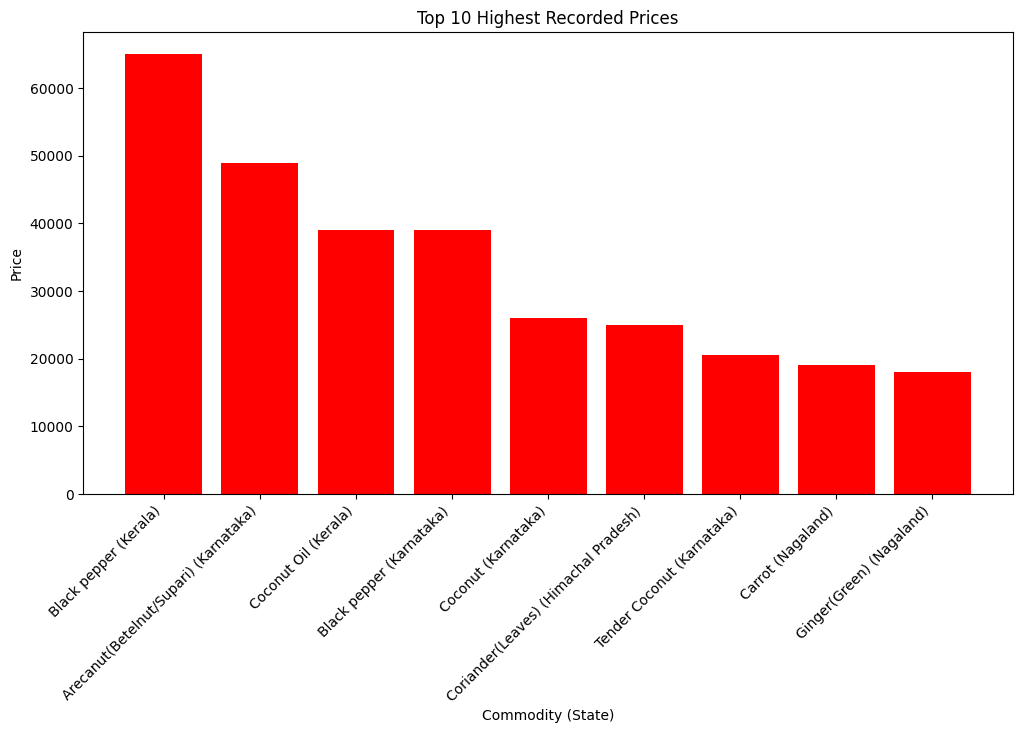

In [81]:
top_prices_pd = top_prices_df.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(top_prices_pd["Commodity"] + " (" + top_prices_pd["State"] + ")", 
        top_prices_pd["price_double"], color="red")
plt.xlabel("Commodity (State)")
plt.ylabel("Price")
plt.title("Top 10 Highest Recorded Prices")
plt.xticks(rotation=45, ha="right")
plt.show()

# Conclusion

The analysis of the Vegetable Mandi (Market) dataset highlights the diversity and structure of agricultural trade across India. The data, consisting of 1,370 clean and complete records, spans 19 states, 121 districts, and 178 markets, showcasing a rich variety of 119 commodities and 147 varieties.

The findings reveal that **Kerala** has the highest representation, while **Potato** emerges as the most traded commodity. Price variables (Min, Max, and Modal Prices) show noticeable variation across states and commodities, reflecting regional market dynamics and commodity demand differences.

Overall, the dataset offers strong potential for agricultural market analytics, price trend prediction, and regional performance evaluation. It serves as a valuable resource for policymakers, traders, and data analysts to understand market patterns, support decision-making, and improve efficiency in India’s agricultural marketing system.
